## Esercitazione 6 - 26 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`, `corde.py`, `secanti.py`,`newton.py` che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tol: tolleranza per il test di arresto.
    Nel caso del metodo di bisezione e di falsa posizione si considera per il test di arresto l’ampiezza del sottointervallo confrontata con tolx.
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `corde.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il coefficiente angolare comune a tutte le rette
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk
La funzione `newton.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  il nome `fpname` della derivata prima della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tols
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `secanti.py` deve assumere come input:

-  due iterati iniziali x_1, x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:         
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

In [1]:
import math
import sympy as sym


In [2]:
def sign(x):
  """
  Funzione segno che restituisce 1 se x è positivo, 0 se x è zero e -1 se x è negativo.
  """
  return math.copysign(1, x)

In [3]:
def metodo_bisezione(fname, a, b, tolx):
 """
 Implementa il metodo di bisezione per il calcolo degli zeri di un'equazione non lineare.

 Parametri:
  f: La funzione da cui si vuole calcolare lo zero.
  a: L'estremo sinistro dell'intervallo di ricerca.
  b: L'estremo destro dell'intervallo di ricerca.
  tol: La tolleranza di errore.

 Restituisce:
  Lo zero approssimato della funzione, il numero di iterazioni e la lista di valori intermedi.
 """
 fa=fname(a)
 fb=fname(b)
 if sign(fa)*sign(fb)>=0:
     print("Non è possibile applicare il metodo di bisezione \n")
     return None, None,None

 it = 0
 v_xk = []

 
 maxit = math.ceil(math.log2((b - a) / tolx))-1

 
 while abs(b - a) > tolx:
    xk = a+(b-a)/2
    v_xk.append(xk)
    it += 1
    fxk=fname(xk)
    if fxk==0:
      return xk, it, v_xk

    if sign(fa)*sign(fxk)>0:  #continua su [xk,b]
      a = xk
      fa=fxk
    elif sign(fxk)*sign(fb)>0:   #continua su [a,xk]
      b = xk
      fb=fxk

 
 return xk, it, v_xk




In [4]:
def falsi(fname, a, b, maxit, tolx,tolf):
 """
 Implementa il metodo di falsa posizione per il calcolo degli zeri di un'equazione non lineare.

 Parametri:
  f: La funzione da cui si vuole calcolare lo zero.
  a: L'estremo sinistro dell'intervallo di ricerca.
  b: L'estremo destro dell'intervallo di ricerca.
  tolx: La tolleranza di errore sulla soluzione
  maxit= numero massuno di iterazioni
  tolf: tolleranza sulla funzione

 Restituisce:
  Lo zero approssimato della funzione, il numero di iterazioni e la lista di valori intermedi.
 """
 fa=fname(a);
 fb=fname(b);
 if sign(fa)*sign(fb)>=0:
     print("Non è possibile applicare il metodo di falsa posizione \n")
     return None, None,None

 it = 0
 v_xk = []
 
 fxk=10

 
 while it < maxit and abs(b - a) > tolx and abs(fxk) > tolf:
    xk = a-fa*(b-a)/(fb-fa)
    v_xk.append(xk)
    it += 1
    fxk=fname(xk)
    if fxk==0:
      return xk, it, v_xk

    if sign(fa)*sign(fxk)>0:  #continua su [xk,b]
      a = xk
      fa=fxk
    elif sign(fxk)*sign(fb)>0:   #continua su [a,xk]
      b = xk
      fb=fxk

 
 return xk, it, v_xk


In [24]:
def newton(fname,fpname,x0,tolx,tolf,nmax):
 #Corde
        xk=[]
        fx0=fname(x0)
        if fpname(x0)==0:
            print("Derivata nulla in x0")
            return None,None,None
        d=fx0/fpname(x0)
        x1=x0-d
        
        fx1=fname(x1)
        xk.append(x1)
        it=1
        
        while it<nmax and  abs(fx1)>=tolf and abs(d)>=tolx*abs(x1) :
           x0=x1
           fx0=fname(x0)
           if fpname(x0)==0:
                print("Derivata nulla in x0")
                return None,None,None
        
           d=fx0/fpname(x0)
           '''
           #x1= ascissa del punto di intersezione tra  la retta che passa per il punto
           (x0,f(x0)) ed è tangente alla funzione f(x) nel punto (x0,f(x0))  e l'asse x
           '''
           x1=x0-d  
           fx1=fname(x1)
           it=it+1
         
           xk.append(x1)
          
        if it==nmax:
            print('raggiunto massimo numero di iterazioni \n')
            
        
        return x1,it,xk

-1 - exp(-x)


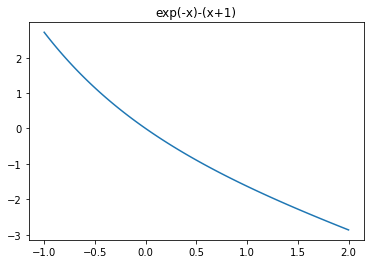

Lo zero approssimato con Bisezione è  è: -2.2737367544323206e-13
f(-2.2737367544323206e-13) = 4.547473508864641e-13
Lo zero approssimato con falsa posizione è : 3.2573943542502093e-13
f(3.2573943542502093e-13) = -6.514788708500419e-13
Lo zero approssimato è: -2.3791786736070093e-14
Errore Newton [6.63110032e-02 1.11102845e-03 3.08653167e-07 2.37917867e-14]
f(1.4142135623724243) = 4.75175454539567e-14


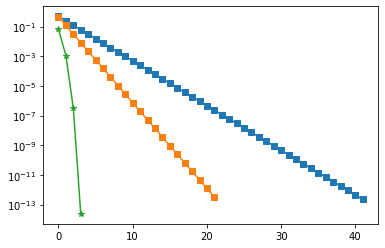

In [26]:
# Esempio di utilizzo
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.utilities.lambdify import lambdify

scelta=1

if scelta==1:
    x=sym.symbols('x')
    fs =  sym.exp(-x)-(x+1)
    dfs=sym.diff(fs,x,1)
    print(dfs)
    titolo='exp(-x)-(x+1)'
    fp=lambdify(x,dfs,np)  #l'ultimo argomento np (nickaname di numpy) serve per specificare che la lambda function 
#può prendere come argomento un numpy array ed eseguire l'operazione su tutte le sue componenti.
    f=lambdify(x,fs,np)

    alfa=0
    a = -1
    b = 2
    x0=-0.5
    xm1=-0.3

if scelta==2:
    x=sym.symbols('x')
    fs =  sym.log(x+3)/sym.log(2)-2 #log_b(a)=log(a)/log(b)
    dfs=sym.diff(fs,x,1)
    print(df)
    titolo='log2(x+3)-2'
    fp=lambdify(x,dfs,np)  #l'ultimo argomento np (nickaname di numpy) serve per specificare che la lambda function 
#può prendere come argomento un numpy array ed eseguire l'operazione su tutte le sue componenti.
    f=lambdify(x,fs,np)

    alfa=1
    a = -1
    b = 2
    x0=-0.5
    xm1=0.5
    
if scelta==3:
    x=sym.symbols('x')
    fs =  sym.sqrt(x)-x**2/4
    dfs=sym.diff(fs,x,1)
    print(df)
    titolo='sqrt(x)-x**2/4'
    fp=lambdify(x,dfs,np)  #l'ultimo argomento np (nickaname di numpy) serve per specificare che la lambda function 
#può prendere come argomento un numpy array ed eseguire l'operazione su tutte le sue componenti.
    f=lambdify(x,fs,np)

    alfa=2.0**(4/3)
    a = 1
    b = 3
    x0=1.8
    xm1=1.5
       
xx=np.linspace(a,b,100)
plt.plot(xx,f(xx))
plt.title(titolo)
plt.show()
tolx = 1e-12
tolf=1e-12
maxit=1000
zero_b,it_b,xk_b = metodo_bisezione(f, a, b, tolx)
zero_f,it_f,xk_f = falsi(f, a, b, maxit, tolx,tolf)
zero_n,it_n,xk_n = newton(f, fp,x0, tolx,tolf, maxit) 

xk_b=np.array(xk_b)

if (zero_b!=None):
    print(f"Lo zero approssimato con Bisezione è  è: {zero_b}")
    print(f"f({zero_b}) = {f(zero_b)}")
    ek_b=np.abs(xk_b-alfa)

    plt.semilogy(range(it_b),ek_b,'-s')

xk_f=np.array(xk_f)
if (zero_f!=None):
    print(f"Lo zero approssimato con falsa posizione è : {zero_f}")
    ek_f=np.abs(xk_f-alfa)
    print(f"f({zero_f}) = {f(zero_f)}")
    plt.semilogy(range(it_f),ek_f,'-s')
    

xk_n=np.array(xk_n)
if (zero_n!=None):
    print(f"Lo zero approssimato è: {zero_n}")
    ek_n=np.abs(xk_n-alfa)
    print("Errore Newton",ek_n)
    print(f"f({zero}) = {f(zero_n)}")
    plt.semilogy(range(it_n),ek_n,'-*')
    
 

 Confrontare i metodi sopra implementati nei casi seguenti:

- f(x) = exp(−x) − (x + 1) in [−1, 2] con x0 = −0.5, x−1 = −0.3, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2] con x0 = −0.5, x−1 = 0.5, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3] con x0 = 1.8, x−1 = 1.5, tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei
tre casi.
Calcolare infine, a partire dai valori di {xk} con k sufficientemente grande, la stima dell’ordine di convergenza p come

p= ln (|x_{k+1}-x_k|/|x_k-x_{k-1}|)/ln (|x_k-x_{k-1}|/|x_{k-1}-x_{k-2}|)

Utilizzare il metodo di Newton e il metodo di Newton modificato per il calcolo
dello zero di molteplicita' 2 della funzione f(x) = 
x^3 + x^2− 33x + 63 con x0 = 1,
tolx = 1.e − 12 e tolf = 1.e − 12. Calcolare infine, a partire dai valori di {xk}
ottenuti nei due casi, la stima dell’ordine di convergenza p.

Utilizzare il metodo di bisezione ed il metodo di Newton per calcolare la radice quadrata di 2. Analizzate i risultati.

Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.


Risolvere i seguenti tre sistemi non lineari:
1) 
2x0-cos(x1)=0

sin(x0)+2x1=0

2) 
x0^2+x1^2-9=0

x0^2+x1*2-2=0

3) 
4x0^2+x_1^2^=4

x0+x1=sin(x0-x1)



Per determinare l'iterato iniziale X 0 , servirsi del metodo grafico per individuare un 
iterato iniziale nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = fi (x1 ,x2 ) e z = h(x1 , x 2 ) e 
definire come iterato iniziale un vettore X 0 oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 
 